In [ ]:
!pip install mp-api pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.4/301.4 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 119.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 138.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.4/127.4 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.9/119.9 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 9.2 MB/s eta 0:00:00
  

In [ ]:
import os
from google.colab import userdata


MP_API_KEY = userdata.get('MP_API_KEY') #os.getenv("MP_API_KEY")  # retrieves the MP API key from the environment variable

if not MP_API_KEY: # displays an error message if the MP API key was not found
    raise RuntimeError(
        "No API key found. Set the MP_API_KEY environment variable."
    )

In [ ]:
from mp_api.client import MPRester
from emmet.core.summary import HasProps

with MPRester(MP_API_KEY) as mpr:
  link = mpr.materials.summary
  data = link.search(
      chemsys="O-*-*", formula="ABC",
      has_props = [HasProps.dielectric]
  )

Retrieving SummaryDoc documents:   0%|          | 0/98 [00:00<?, ?it/s]

In [ ]:
data[0].model_dump()

dict_keys(['builder_meta', 'nsites', 'elements', 'nelements', 'composition', 'composition_reduced', 'formula_pretty', 'formula_anonymous', 'chemsys', 'volume', 'density', 'density_atomic', 'symmetry', 'material_id', 'deprecated', 'deprecation_reasons', 'last_updated', 'origins', 'warnings', 'structure', 'property_name', 'task_ids', 'uncorrected_energy_per_atom', 'energy_per_atom', 'formation_energy_per_atom', 'energy_above_hull', 'is_stable', 'equilibrium_reaction_energy_per_atom', 'decomposes_to', 'xas', 'grain_boundaries', 'band_gap', 'cbm', 'vbm', 'efermi', 'is_gap_direct', 'is_metal', 'es_source_calc_id', 'bandstructure', 'dos', 'dos_energy_up', 'dos_energy_down', 'is_magnetic', 'ordering', 'total_magnetization', 'total_magnetization_normalized_vol', 'total_magnetization_normalized_formula_units', 'num_magnetic_sites', 'num_unique_magnetic_sites', 'types_of_magnetic_species', 'bulk_modulus', 'shear_modulus', 'universal_anisotropy', 'homogeneous_poisson', 'e_total', 'e_ionic', 'e_el

In [ ]:
data[0].model_dump()['efermi']

2.15708051

In [ ]:
data[0].model_dump()['formula_pretty']

'NbNO'

In [ ]:
data[0].model_dump()['symmetry']

{'crystal_system': 'Tetragonal',
 'symbol': 'I4_1md',
 'hall': None,
 'number': 109,
 'point_group': '4mm',
 'symprec': 0.1,
 'angle_tolerance': 5.0,
 'version': '2.5.0'}

In [ ]:
import pandas as pd

# Convert SummaryDoc items to dictionaries, then load them into a DataFrame
records = [d.model_dump() for d in data]
data_df = pd.DataFrame.from_records(records)

print(f"Número de materiais para análise: {len(data_df)}")

FIELDS = data_df.columns
SYM_FEATURES = [ #==# estas features foram incluidas pois possuem registros sem dados
                # nestes campos e podem influenciar no fit do modelo
                # futuramente verificar qual a melhor forma de preencher estes dados
                'cbm', 'vbm',
                 #'universal_anisotropy', 'homogeneous_poisson',
                # ====
                 'nsites', 'nelements',
                 #'elements', 'symmetry','structure',
                'builder_meta', 'composition', 'warnings',
                'composition_reduced', 'formula_pretty',
                'formula_anonymous', 'chemsys',
                'material_id', 'deprecated', 'deprecation_reasons',
                'last_updated', 'origins', 'property_name',
                'task_ids', 'is_stable', 'equilibrium_reaction_energy_per_atom',
                'decomposes_to', 'xas', 'grain_boundaries', 'is_gap_direct',
                'is_metal', 'es_source_calc_id', 'bandstructure', 'dos',
                'dos_energy_up', 'dos_energy_down', 'is_magnetic', 'ordering',
                'types_of_magnetic_species',
                 #'bulk_modulus', 'shear_modulus',
                'weighted_surface_energy_EV_PER_ANG2', 'weighted_surface_energy',
                'weighted_work_function', 'surface_anisotropy', 'shape_factor',
                'has_reconstructed', 'possible_species', 'has_props', 'theoretical',
                'database_IDs', 'fields_not_requested',
                 # features que nao são significativas para o aprendizado do modelo
                #'n', 'density', 'volume', 'band_gap', 'density_atomic',
                'e_ij_max',
                'total_magnetization', 'total_magnetization_normalized_vol', 'total_magnetization_normalized_formula_units', 'num_magnetic_sites'
]

data_df.drop(columns=SYM_FEATURES, inplace=True) # remove as colunas com dados simbolicos, mantendo apenas dados numericos

data_df.info()

Número de materiais para análise: 98
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   elements                     98 non-null     object 
 1   volume                       98 non-null     float64
 2   density                      98 non-null     float64
 3   density_atomic               98 non-null     float64
 4   symmetry                     98 non-null     object 
 5   structure                    98 non-null     object 
 6   uncorrected_energy_per_atom  98 non-null     float64
 7   energy_per_atom              98 non-null     float64
 8   formation_energy_per_atom    98 non-null     float64
 9   energy_above_hull            98 non-null     float64
 10  band_gap                     98 non-null     float64
 11  efermi                       98 non-null     float64
 12  num_unique_magnetic_sites    98 non-null   

In [ ]:
# TRANSFORMACAO DE DADOS DE BULK_MODULUS

# Separar os dados do dicionário em colunas
bulk_cols = data_df['bulk_modulus'].apply(pd.Series)

# Renomear as colunas
bulk_cols = bulk_cols.rename(columns={
    'voigt': 'bulk_modulus_voigt',
    'reuss': 'bulk_modulus_reuss',
    'vrh': 'bulk_modulus_vrh'
})

# Concatenar com o DataFrame original (sem a coluna antiga)
data_df = pd.concat([data_df.drop(columns=['bulk_modulus']), bulk_cols], axis=1)

# TRANSFORMACAO DE DADOS SHEAR_MODULUS

# Separar os dados do dicionário em colunas
shear_cols = data_df['shear_modulus'].apply(pd.Series)

# Renomear as colunas
shear_cols = shear_cols.rename(columns={
    'voigt': 'shear_modulus_voigt',
    'reuss': 'shear_modulus_reuss',
    'vrh': 'shear_modulus_vrh'
})

# Concatenar com o DataFrame original (sem a coluna antiga)
data_df = pd.concat([data_df.drop(columns=['shear_modulus']), shear_cols], axis=1)


# TRANSFORMACAO DADOS 'ELEMENTS'
from pymatgen.core import Element

# Separar os elementos em colunas
data_df[['element1', 'element2', 'element3']] = pd.DataFrame(
    data_df['elements'].tolist(), index=data_df.index)

# Converter para número atômico usando pymatgen
data_df['element1'] = data_df['element1'].apply(lambda x: Element(x).Z)
data_df['element2'] = data_df['element2'].apply(lambda x: Element(x).Z)
data_df['element3'] = data_df['element3'].apply(lambda x: Element(x).Z)

# Remover a coluna original se quiser
data_df = data_df.drop(columns=['elements'])


# DADOS de simetria - numero
data_df['symmetry'] = data_df['symmetry'].apply(lambda x: x['number'])


# SEPARAÇÃO DE DADOS DO PARAMETRO DE REDE
# Extrair apenas os campos desejados 'structure',
lattice_cols = data_df['structure'].apply(lambda x: {
    'a': x['lattice']['a'],
    'b': x['lattice']['b'],
    'c': x['lattice']['c'],
    'alpha': x['lattice']['alpha'],
    'beta': x['lattice']['beta'],
    'gamma': x['lattice']['gamma']
})

# Transformar em colunas
df_lattice = pd.DataFrame(lattice_cols.tolist())

# Concatenar com o DataFrame original (sem a coluna 'lattice')
data_df = pd.concat([data_df.drop(columns=['structure']), df_lattice], axis=1)



In [ ]:
data_df.dropna(inplace=True)
#data_df.isna().sum()
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 0 to 93
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   volume                       41 non-null     float64
 1   density                      41 non-null     float64
 2   density_atomic               41 non-null     float64
 3   symmetry                     41 non-null     int64  
 4   uncorrected_energy_per_atom  41 non-null     float64
 5   energy_per_atom              41 non-null     float64
 6   formation_energy_per_atom    41 non-null     float64
 7   energy_above_hull            41 non-null     float64
 8   band_gap                     41 non-null     float64
 9   efermi                       41 non-null     float64
 10  num_unique_magnetic_sites    41 non-null     int64  
 11  universal_anisotropy         41 non-null     float64
 12  homogeneous_poisson          41 non-null     float64
 13  e_total                    

In [ ]:
# converter valores nulos ou none
#df = df.fillna(0)
data_df.describe()

,volume,density,density_atomic,symmetry,uncorrected_energy_per_atom,energy_per_atom,formation_energy_per_atom,energy_above_hull,band_gap,efermi,...,shear_modulus_vrh,element1,element2,element3,a,b,c,alpha,beta,gamma
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,...,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,131.054371,5.097798,17.429182,119.829268,-14.006369,-6.674094,-2.403031,0.014945,3.243583,1.700798,...,31.607122,28.804878,20.317073,21.707317,4.767473,5.150438,6.167742,86.612797,83.783016,83.281816
std,74.409753,2.170294,5.104006,62.917367,7.551859,1.964397,1.166160,0.028166,1.595926,1.794807,...,25.570529,28.729096,19.745175,19.195369,1.018751,1.474429,1.672652,17.155453,21.122362,22.039980
min,40.261103,1.311600,8.674295,9.000000,-30.753834,-10.648492,-4.214093,0.000000,0.709700,-2.424549,...,1.038000,1.000000,1.000000,8.000000,3.353145,3.141440,3.713077,33.077058,33.077060,33.077054
25%,78.564066,3.709574,13.442314,59.000000,-18.740609,-8.005647,-3.530002,0.000000,1.709500,0.725782,...,12.222000,8.000000,8.000000,8.000000,3.937745,3.962570,4.961361,81.800973,67.248919,66.899551
50%,117.287589,5.110313,15.592104,129.000000,-11.318360,-7.306763,-1.914224,0.000000,3.236000,1.700255,...,22.372000,17.000000,9.000000,8.000000,4.308339,4.447570,5.887382,90.000000,90.000000,90.000000
75%,155.870954,6.585385,21.584350,139.000000,-7.918323,-4.704168,-1.476768,0.015264,4.920300,2.660478,...,50.433000,47.000000,29.000000,37.000000,5.773627,6.087843,7.305060,90.000000,90.000000,90.000000
max,327.124230,10.896074,27.260352,216.000000,-4.143433,-3.889390,-0.923846,0.105389,5.632800,4.601306,...,129.730000,89.000000,68.000000,73.000000,6.800546,8.584005,9.604817,141.007988,141.007988,140.845265


 o que se deseja prever é `e_total`, `e_ionic` e `e_electronic`:
 - e_total
 - e_ionic
 - e_electronic

TESTANDO REGRESSÃO PARA OBTER DADOS DO E_TOTAL

VERSÃO FINAL PARA AVALIAR CLASSIFICADORES EM MODELOS DE REGRESSÃO PARA PREVER OS DADOS DE `E_TOTAL` DE CADA MATERIAL

In [ ]:
REMOVE_FEATURES = ["n",
                   #"band_gap",
                   "symmetry",
                   "uncorrected_energy_per_atom",
                   "num_unique_magnetic_sites",
                   "universal_anisotropy", "homogeneous_poisson",
                   "element1",
                   "element2",
                   "element3",
                   "a", "b", "c",
                   "alpha", "beta", "gamma",
                   "shear_modulus_reuss",
                   "shear_modulus_voigt",
                   "shear_modulus_vrh",
                   "bulk_modulus_reuss",
                   "bulk_modulus_vrh",
                   "bulk_modulus_voigt",
                   "volume",
                   "density_atomic",
                   #"efermi",
                   #"energy_above_hull",
                   ]

FEATURES_MANTER = ["efermi", "band_gap", "density",
                   "uncorrected_energy_per_atom",
                   "energy_per_atom", "formation_energy_per_atom",
                   "volume"
                   ]

norm_data = False


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.inspection import permutation_importance

TEST_SIZE = 0.2
RANDOM_SEED = 777
POSSIBLE_TARGETS = ["e_total","e_ionic","e_electronic"]
TARGET = ["e_electronic"]

df = data_df.drop(columns=POSSIBLE_TARGETS)
#df = df.drop(columns=REMOVE_FEATURES)
df = df[FEATURES_MANTER]
FEATURES = df.columns
df[TARGET] = data_df[TARGET]


indexes = df.index
train_indexes, test_indexes = train_test_split(
    indexes,
    test_size=TEST_SIZE,
    random_state=RANDOM_SEED,
)

df_train = df.loc[train_indexes]
df_test = df.loc[test_indexes]

X_train = df_train.reindex(FEATURES, axis=1).values
y_train = df_train.reindex(TARGET, axis=1).values.ravel()
X_test = df_test.reindex(FEATURES, axis=1).values
y_test = df_test.reindex(TARGET, axis=1).values.ravel()


# normalizar dados
if norm_data:
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)


# linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# k-nearst neighbors regressor
knn = KNeighborsRegressor()
param_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 = Manhattan, 2 = Euclidiana
}
grid_knn = GridSearchCV(knn, param_knn, cv=5, scoring='neg_mean_squared_error')
grid_knn.fit(X_train, y_train)


# random forest regressor
rf = RandomForestRegressor()
param_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_rf = GridSearchCV(rf, param_rf, cv=5, scoring='neg_mean_squared_error')
grid_rf.fit(X_train, y_train)

# support vector regression
svr = SVR()
param_svr = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2]
}
grid_svr = GridSearchCV(svr, param_svr, cv=5, scoring='neg_mean_squared_error')
grid_svr.fit(X_train, y_train)

# GradientBoostingRegressor
gbr = GradientBoostingRegressor()
param_gbr = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}
grid_gbr = GridSearchCV(gbr, param_gbr, cv=5, scoring='neg_mean_squared_error')
grid_gbr.fit(X_train, y_train)



models = {
    'LinearRegression': lr,
    'KNN': grid_knn,
    'RandomForest': grid_rf.best_estimator_,
    'SVR': grid_svr.best_estimator_,
    'GradientBoosting': grid_gbr.best_estimator_,
}

for name, model in models.items():
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
    importances = pd.Series(result.importances_mean, index=FEATURES).sort_values(ascending=False)

    y_pred = model.predict(X_test)

    print(f'================{name}=====================')
    print(f'FEATURES IMPORTANCES FOR MODEL: {name}')
    print(importances)
    print()

    print(f'BEST PARAMS:')
    print(model.get_params())
    print()

    print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
    print("Root Mean Squared Error:", metrics.root_mean_squared_error(y_test, y_pred))
    print("R2 score:", metrics.r2_score(y_pred, y_test))
    print()
    #print("Y_pred: ", y_pred)
    #print("Y_test: ", y_test)

================LinearRegression=====================
FEATURES IMPORTANCES FOR MODEL: LinearRegression
energy_per_atom                1.546733
density                        1.019627
band_gap                       0.770180
efermi                         0.618606
formation_energy_per_atom      0.115224
volume                        -0.042375
uncorrected_energy_per_atom   -0.098987
dtype: float64

BEST PARAMS:
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

Mean Absolute Error: 0.6580006485851124
Root Mean Squared Error: 0.859844270349273
R2 score: -0.41370785329195603

================KNN=====================
FEATURES IMPORTANCES FOR MODEL: KNN
uncorrected_energy_per_atom    0.664049
volume                         0.316545
density                        0.123205
efermi                         0.108123
energy_per_atom                0.102614
band_gap                       0.095267
formation_energy_per_atom      0.046568
dtype: float64

BEST PARAMS:
{'cv': 5, '

# MELHORES RESULTADOS (que podem ser interessantes):

> FEATURES USADAS:
*   *efermi*
*   *band_gap*
*   *density*
*   *energy_per_atom*
*   *formation_energy_per_atom*
*   *energy_above_hull*

> TARGET:
- e_electronic (constante dielétrica eletrônica)

> Melhor modelo:
- **Random Forest**

> Parâmetros:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


> Métricas de avaliação usadas:
```
Mean Absolute Error: 0.22409552363428173
Root Mean Squared Error: 0.3036410566809362
R2 score: 0.874354205083937
(os valores podem mudar +-[0.85 a 0.87] a cada reexecução)
```

> Outras informações:

Dados não normalizados.

Treinamento com 80% dos dados e 20% para teste, usando a estratégia de cross-validation, com 5-folds.

> Outros modelos testados, em ordem (melhor resultado para o pior):

- kNN
- SVM
- GradientBoosting
- LinearRegression





PLOT DE DADOS

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

TEST_SIZE = 0.2
RANDOM_SEED = 777
POSSIBLE_TARGETS = ["e_total","e_ionic","e_electronic"]
TARGET = ["e_electronic"]

df = data_df.drop(columns=POSSIBLE_TARGETS)
#df = df.drop(columns=REMOVE_FEATURES)
df = df[FEATURES_MANTER]
FEATURES = df.columns
df[TARGET] = data_df[TARGET]


indexes = df.index
train_indexes, test_indexes = train_test_split(
    indexes,
    test_size=TEST_SIZE,
    random_state=RANDOM_SEED,
)

df_train = df.loc[train_indexes]
df_test = df.loc[test_indexes]

X_train = df_train.reindex(FEATURES, axis=1).values
y_train = df_train.reindex(TARGET, axis=1).values.ravel()
X_test = df_test.reindex(FEATURES, axis=1).values
y_test = df_test.reindex(TARGET, axis=1).values.ravel()


params = {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error',
          'max_depth': 10, 'max_features': 1.0, 'max_leaf_nodes': None,
          'max_samples': None, 'min_impurity_decrease': 0.0,
          'min_samples_leaf': 1, 'min_samples_split': 2,
          'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None,
          'n_estimators': 200, 'n_jobs': None, 'oob_score': False,
          'random_state': None, 'verbose': 0, 'warm_start': False}

rf = RandomForestRegressor(**params)

#grid_rf = GridSearchCV(rf, param_rf, cv=5, scoring='neg_mean_squared_error')
#grid_rf.fit(X_train, y_train)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", metrics.root_mean_squared_error(y_test, y_pred))
print("R2 score:", metrics.r2_score(y_pred, y_test))
# Mean Absolute Error: 0.19685144472821461
# Root Mean Squared Error: 0.272009123251611
# R2 score: 0.9074807597011465 (melhor valor até agora)
# valores podem mudar por questoes de pseudoaleatoriedade


Mean Absolute Error: 0.2871726451695063
Root Mean Squared Error: 0.33628172700593195
R2 score: 0.8423336573881145


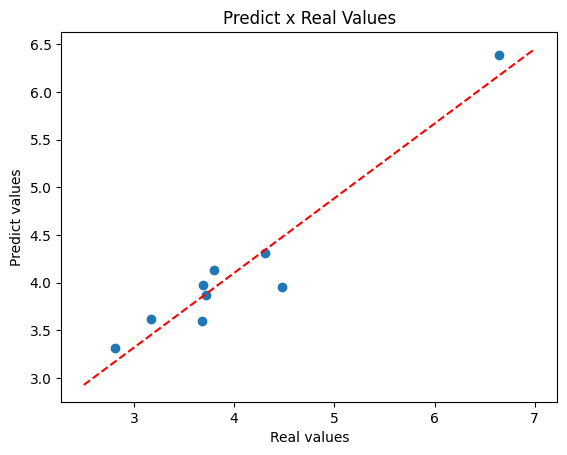

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

p = np.poly1d(np.polyfit(y_test, y_pred, 1))
xp = np.linspace(2.5, 7, 100)
plt.scatter(y_test, y_pred, label='Previsto x Real')
plt.plot(xp, p(xp), 'r--', label='Polinomio 1 ordem')
plt.xlabel('Real values')
plt.ylabel('Predict values')
plt.title('Predict x Real Values')
#plt.legend()
#plt.grid(True)
plt.show()

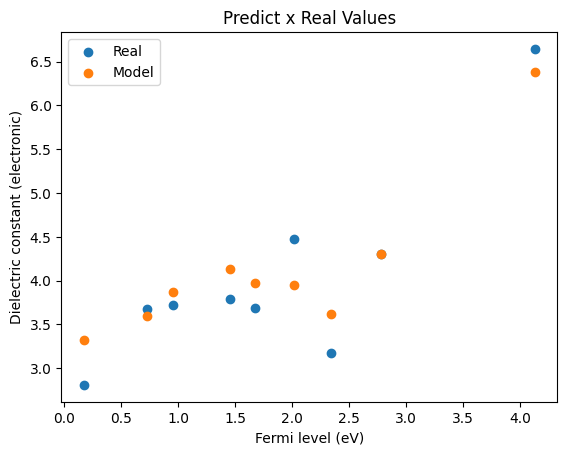

In [ ]:
plt.scatter(df_test['efermi'], y_test, label='Real')
plt.scatter(df_test['efermi'], y_pred, label='Model')
plt.xlabel('Fermi level (eV)')
plt.ylabel('Dielectric constant (electronic)')
plt.title('Predict x Real Values')
plt.legend()
plt.show()

In [ ]:
df_test.columns

Index(['density', 'energy_per_atom', 'formation_energy_per_atom',
       'energy_above_hull', 'band_gap', 'efermi', 'e_electronic'],
      dtype='object')